# **Section 6: Bonus exercises**

## **Exercise 1.**

Let $\mathbf{A}$ be:
$$
\mathbf{A} =
\left[
  \begin{matrix}
  0.3 & 0.6 & 0.1 \\
  0.5 & 0.2 & 0.3 \\
  0.4 & 0.1 & 0.5
  \end{matrix}
\right]
$$
and let $\mathbf{v}$ a random 3D vector which elements sum to 1.
Define $\mathbf{v}_{i+1} = \mathbf{v}_i\mathbf{A}$, where $\mathbf{v}_1 = \mathbf{v}A$. The task is to plot the Euclidean distance between $\mathbf{v}_i$ vectors.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[0.3,0.6,0.1],[0.5,0.2,0.3],[0.4,0.1,0.5]])

v = np.random.random(3)
v = v/np.sum(v)

Do the loop to calculate Euclidean distances:

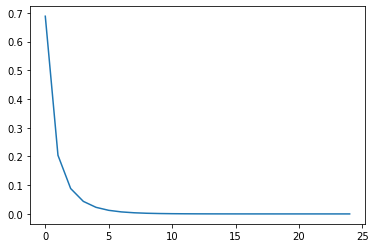

In [10]:
x = range(25)
y = []

for i in x:
  v_new = v*A
  y.append(np.sqrt(np.sum((v-v_new)*(v-v_new))))
  v=v_new

plt.plot(x,y)
plt.xlabel='Number of iterations'
plt.ylabel='Euclidean distance'

The distance decreases to zero, meaning we found an eigenvector with eigenvalue 1.

## **Exercise 2.**

* Demonstrate the central limit theorem
* If $Y = X_1 + X_2 + \dots + X_n$, where $X_i$ are independent, identically distributed random variables; then, $Y \rightarrow$ Gaussian as $n \rightarrow \infty$.

Using the uniform distribution for $X_i$:

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  1.,  2.,  2.,  2.,  4.,  6.,  6.,
         9., 17., 21., 19., 28., 30., 29., 37., 43., 44., 45., 52., 51.,
        58., 51., 50., 54., 37., 47., 41., 37., 29., 31., 25., 31., 11.,
         9., 10.,  7.,  5.,  2.,  3.,  3.,  3.,  1.,  1.,  3.]),
 array([467.72475515, 468.93937766, 470.15400016, 471.36862267,
        472.58324518, 473.79786768, 475.01249019, 476.22711269,
        477.4417352 , 478.65635771, 479.87098021, 481.08560272,
        482.30022523, 483.51484773, 484.72947024, 485.94409275,
        487.15871525, 488.37333776, 489.58796026, 490.80258277,
        492.01720528, 493.23182778, 494.44645029, 495.6610728 ,
        496.8756953 , 498.09031781, 499.30494031, 500.51956282,
        501.73418533, 502.94880783, 504.16343034, 505.37805285,
        506.59267535, 507.80729786, 509.02192036, 510.23654287,
        511.45116538, 512.66578788, 513.88041039, 515.0950329 ,
        516.3096554 , 517.52427791, 518.73890041, 519.95352292,
        521.

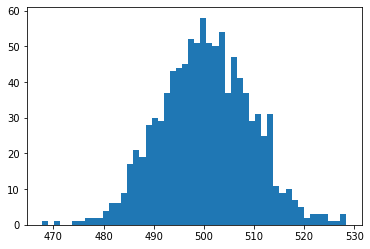

In [11]:
variables = np.random.random((1000,1000))
gaussian = np.sum(variables,axis=0)

plt.hist(gaussian,bins=50)

Expected mean: $\mathbb{E}Y = \mathbb{E}\sum_i X_i = \sum_i \mathbb{E}X_i = \frac{n}{2}$.

Expected variance: $\mathbb{D}^2Y = \mathbb{D^2}\sum_i X_i = \sum_i \mathbb{D^2}X_i = \frac{n}{12}$.

Let's plot this distribution!


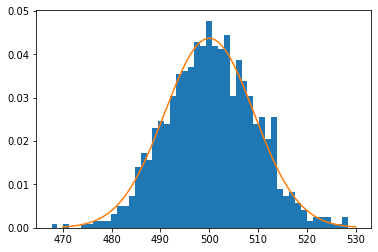

In [12]:
from scipy.stats import norm

x = np.linspace(470,530,1000)
fx = norm.pdf(x,loc=1000./2,scale=np.sqrt(1000./12))

plt.hist(gaussian,bins=50,density=True);
plt.plot(x,fx)

## **Exercise 3.**

* Load the MNIST dataset
* Plot the mean image of each digits

In [13]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train type: ', type(train_X))
print('Y_train type: ', type(train_y))
print('X_test type:  ', type(test_X))
print('Y_test type:  ', type(test_y))
print('')
print('X_train shape: ' + str(train_X.shape))
print('Y_train shape: ' + str(train_y.shape))
print('X_test shape:  '  + str(test_X.shape))
print('Y_test shape:  '  + str(test_y.shape))

X_train type:  <class 'numpy.ndarray'>
Y_train type:  <class 'numpy.ndarray'>
X_test type:   <class 'numpy.ndarray'>
Y_test type:   <class 'numpy.ndarray'>

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)


5


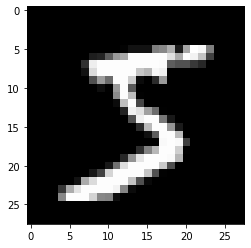

In [25]:
plt.imshow(train_X[0],cmap='gray')
print(train_y[0])

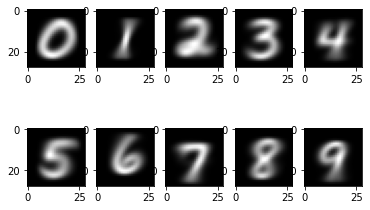

In [41]:
for i in range(10):
  temp = train_X[train_y == i]
  mean_image = np.sum(temp,axis=0) / np.sum(temp)
  plt.subplot(2,5,i+1)
  plt.imshow(mean_image,cmap='gray')

## **Exercise 4.**

* Write a function that rotates an image 90 degrees clockwise
* Use both for loops and numpy methods

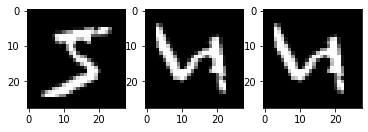

In [52]:
def rotate90_loops(image):
  dimensions = image.shape
  temp = np.zeros((dimensions[1],dimensions[0]))
  for i in range(dimensions[0]):
    for j in range(dimensions[1]):
      temp[i,j] = image[dimensions[0]-1-j,i]
  return temp

def rotate90_np(image):
  return np.fliplr(np.swapaxes(image,0,1))

rotated_image = rotate90_loops(train_X[0])
rotated_image2 = rotate90_np(train_X[0])

plt.subplot(1,3,1)
plt.imshow(train_X[0],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(rotated_image,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(rotated_image2,cmap='gray')

## **Exercise 5.**

* Write a function that tests whether or not a matrix is symmetric.
* Use both ways: 1. for loops, 2. numpy methods

In [60]:
def is_symmetric_loop(matrix):
  dimensions = matrix.shape
  if dimensions[0] != dimensions[1]:
    return False
  for i in range(dimensions[0]):
    for j in range(dimensions[1]):
      if not np.isclose(matrix[i][j], matrix[j][i]):
        return False
  return True

def is_symmetric_np(matrix):
  dimensions = matrix.shape
  if dimensions[0] != dimensions[1]:
    return False
  return np.allclose(matrix,matrix.T)

S = np.array([[1,2,3],[2,4,7],[3,7,6]])
print(S)
print(is_symmetric_loop(S))
print(is_symmetric_np(S))

N = np.array([[1,2,3],[2,4,5],[3,7,6]])
print(N)
print(is_symmetric_loop(N))
print(is_symmetric_np(N))

[[1 2 3]
 [2 4 7]
 [3 7 6]]
True
True
[[1 2 3]
 [2 4 5]
 [3 7 6]]
False
False


## **Exercise 6.**
* Generate a generalized XOR dataset: `x1 > 0 XOR x2 > 0`
* Plot on a scatterplot with two colors

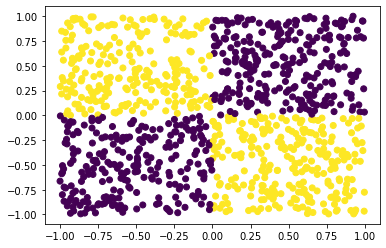

In [61]:
N = 1000
X = (2*np.random.random((N,2)) - 1)
Y = np.zeros(N)
Y = (X[:,0] > 0) ^ (X[:,1] > 0)
plt.scatter(X[:,0],X[:,1],c=Y);

## **Exercise 7. and 9.**

* Generate, plot, and save the ''Donut Dataset'' (concentric circles dataset) with quadratic features
* Create a dataframe with `(x1,x2,y)`
* Save to CSV with headers

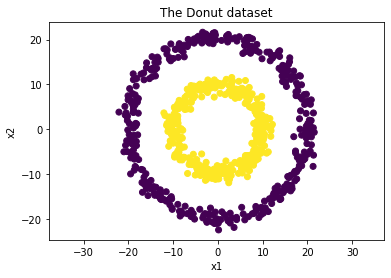

In [68]:
N = 400

#Set mean radii for the two categories
R1 = 10.0
R2 = 20.0

#Set variance of radii for the two categories
std1 = 1.0
std2 = 1.0

x1 = []
x2 = []
y = []

# Sample radii for both categories
r1 = R1 + std1*np.random.randn(N)
r2 = R2 + std2*np.random.randn(N)

# Sample angles
theta1 = np.random.uniform(0,2*np.pi,N)
theta2 = np.random.uniform(0,2*np.pi,N)

# Going from polar coordinates to cartesian coordinates
x1.extend(r1*np.cos(theta1))
x2.extend(r1*np.sin(theta1))
y.extend(np.ones(N))
x1.extend(r2*np.cos(theta2))
x2.extend(r2*np.sin(theta2))
y.extend(np.zeros(N))

ax = plt.axes(xlabel='x1',ylabel='x2',title='The Donut dataset')
ax.axis('equal') # Setting axis scales equal, so the donut is really circular
plt.scatter(x1,x2,c=y);

In [70]:
import pandas as pd

df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
df.head()

,x1,x2,y
0,-2.512303,-11.194629,1.0
1,-5.706286,9.491800,1.0
2,-5.489318,-7.870179,1.0
3,-2.895502,-8.153960,1.0
4,-2.779187,-11.427171,1.0


In [73]:
df.to_csv('dataframe.csv',index=False)
!head dataframe.csv

x1,x2,y
-2.512303168308846,-11.194628746914015,1.0
-5.706285748923014,9.491800491815187,1.0
-5.489317993299946,-7.870178900664468,1.0
-2.895501974385271,-8.153959760805549,1.0
-2.779187112745022,-11.427171433609479,1.0
-3.987387846588967,10.054961407701242,1.0
-9.288813832437684,-5.462068798261712,1.0
-3.5721048522295726,-8.50182720605757,1.0
-3.623343486816114,-5.534697777474932,1.0


## **Exercise 8.**

* Generate and plot the spiral dataset
* Tip: parametrize radius and angle as:
\begin{align}
r(t) \propto t \\
\theta(t) \propto t
\end{align}

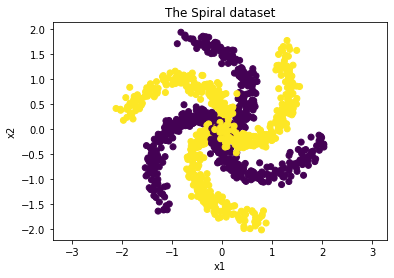

In [93]:
x1 = []
x2 = []
y = []

N = 200
std = 0.1

for i in range(6):
  t = np.random.uniform(0,2,N)

  x1.append(std*np.random.randn(N) + t*np.cos(t+i*2.*np.pi/6.))
  x2.append(std*np.random.randn(N) + t*np.sin(t+i*2.*np.pi/6.))
  y.append([i%2]*N)

ax = plt.axes(xlabel='x1',ylabel='x2',title='The Spiral dataset')
ax.axis('equal') # Setting axis scales equal, so the donut is really circular
plt.scatter(x1,x2,c=y);